In [1]:
from utils.utils import *

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


## Epidemics

### GKAN

In [ ]:
model_path = './saved_models_optuna/model-epidemics-gkan/epidemics-new-data/2/gkan'

In [ ]:
pysr_model = lambda : get_pysr_model(
    model_selection="score",
    random_state = 0,
    deterministic=True,
    parallelism='serial',
    n_iterations=150
)

symb_model_black_box = fit_black_box_from_kan(
    model_path=model_path,
    n_g_hidden_layers=2,
    n_h_hidden_layers=2,
    theta=-np.inf,
    pysr_model=pysr_model,
    sample_size=9000,
    message_passing=False
)

/home/rcappi/.conda/envs/my_env/lib/python3.12/site-packages/pysr/sr.py:2774: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/rcappi/.conda/envs/my_env/lib/python3.12/site-packages/pysr/sr.py:2774: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


In [ ]:
symb_model_black_box

\sum_{j}( 0.500805746365327*x_j*(0.9996049 - x_i)) - 0.49989313*x_i

### MLP-based baseline

In [ ]:
model_path_mpnn = './saved_models_optuna/model-epidemics-mpnn/epidemics-new-data/1'

In [ ]:
pysr_model = lambda : get_pysr_model(
    model_selection="score",
    random_state = 0,
    deterministic=True,
    parallelism='serial',
    n_iterations=150
)

mpnn_symb = fit_mpnn(
    model_path=model_path_mpnn,
    pysr_model=pysr_model,
    sample_size=9000,
    message_passing=False
)


/home/rcappi/.conda/envs/my_env/lib/python3.12/site-packages/pysr/sr.py:2774: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/rcappi/.conda/envs/my_env/lib/python3.12/site-packages/pysr/sr.py:2774: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


In [ ]:
mpnn_symb

\sum_{j}( x_i*(0.49942818 - 0.49865368*x_j)) - 0.5019439*x_i

## Kuramoto

### GKAN

In [ ]:
model_path = 'saved_models_optuna/model-kuramoto-gkan/kuramoto-new-data/0/gkan'

In [ ]:
pysr_model = lambda : get_pysr_model(
    model_selection="score",
    n_iterations=200
)

symb_model_black_box = fit_black_box_from_kan(
    model_path=model_path,
    n_g_hidden_layers=2,
    n_h_hidden_layers=2,
    theta=0.1,
    pysr_model=pysr_model,
    sample_size=8000,
    message_passing=False
)

Pruning node (0,0)


/home/rcappi/.conda/envs/my_env/lib/python3.12/site-packages/pysr/sr.py:2774: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Pruning node (0,0)


/home/rcappi/.conda/envs/my_env/lib/python3.12/site-packages/pysr/sr.py:2774: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


In [ ]:
symb_model_black_box

\sum_{j}( -0.49825495*sin(x_i - x_j)) + 0.040180836*x_i + 1.2174591

## Test Experiments

In [2]:
import optuna
from optuna.storages import JournalStorage
from optuna.storages.journal import JournalFileBackend
from experiments.experiments_gkan import ExperimentsGKAN

storage = JournalStorage(JournalFileBackend("optuna_journal_storage.log"))

/home/rcappi/.conda/envs/my_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Kuramoto

In [3]:
optuna.delete_study(study_name="model-kuramoto-gkan-test-new-dataset", storage=storage)

In [4]:
config_path = './configs/config_kuramoto.yml'
config = load_config(config_path)
config['epochs'] = 10


exp = ExperimentsGKAN(
    config=config,
    n_trials=2,
    study_name='test-new-dataset',
    process_id=0,
    store_to_sqlite = False
)



In [ ]:
exp.run()

### Test traffic data

In [3]:
from train_and_eval import fit, eval_model

In [3]:
optuna.delete_study(study_name="model-metrla-gkan-test-new-dataset", storage=storage)

In [4]:
config_path = './configs/config_metrla_gkan.yml'
config = load_config(config_path)
config['epochs'] = 10
config['name'] = 'metrla'
config['n_iter'] = 119
config['method'] = 'midpoint'

In [5]:
exp = ExperimentsGKAN(
    config=config,
    n_trials=2,
    study_name='test-new-dataset',
    process_id=0,
    store_to_sqlite = False
)

In [6]:
scaler = exp.pre_processing(exp.training_set)

#### LB-Baseline

In [7]:
from models.baseline.baseline import LB_ODE

LB_base = LB_ODE(model_path='./saved_models_optuna/tmp-lb')

eval_model(
    model=LB_base,
    valid_data=exp.valid_set,
    criterion=exp.criterion,
    scaler=scaler
)

3.0420312881469727

In [11]:
exp.epochs = 10
exp.run()

[I 2025-04-12 15:34:07,677] A new study created in Journal with name: model-metrla-gkan-test-new-dataset
[I 2025-04-12 15:35:47,731] Trial 0 finished with value: 3.203813314437866 and parameters: {'lr': 0.00020348186570393845, 'lamb': 0.0, 'batch_size': 64, 'use_orig_reg': True, 'lamb_g_net': 0.00027975130450884984, 'lamb_h_net': 0.0023810456161550758, 'grid_size_g_net': 9, 'spline_order_g_net': 1, 'range_limit_g_net': 1, 'mu_1_g_net': 0.8, 'mu_2_g_net': 0.7, 'hidden_dim_g_net': 1, 'grid_size_h_net': 6, 'spline_order_h_net': 1, 'range_limit_h_net': 1, 'mu_1_h_net': 0.7, 'mu_2_h_net': 0.6, 'hidden_dim_h_net': 4}. Best is trial 0 with value: 3.203813314437866.
[I 2025-04-12 15:38:45,994] Trial 1 finished with value: 3.2018043994903564 and parameters: {'lr': 0.001476867685516042, 'lamb': 0.0, 'batch_size': 64, 'use_orig_reg': True, 'lamb_g_net': 0.0013656022150945956, 'lamb_h_net': 0.0008673871933877135, 'grid_size_g_net': 8, 'spline_order_g_net': 3, 'range_limit_g_net': 1, 'mu_1_g_net': 

#### TG-ODE baseline

In [5]:
optuna.delete_study(study_name="model-metrla-tg-ode-test-new-dataset", storage=storage)

In [3]:
from experiments.experiments_tgode import ExperimentsTGODE

config_path = './configs/config_metrla_tg-ode.yml'
config_tgode = load_config(config_path)
config_tgode['n_iter'] = 5
config_tgode['epochs'] = 10

exp = ExperimentsTGODE(
    config=config_tgode,
    n_trials=2,
    study_name='test-new-dataset',
    process_id=0,
    store_to_sqlite = False
)

In [4]:
exp.run()

[I 2025-04-12 18:19:21,424] A new study created in Journal with name: model-metrla-tg-ode-test-new-dataset
[I 2025-04-12 18:28:58,157] Trial 0 finished with value: 3.4179489612579346 and parameters: {'lr': 0.0039224896128573815, 'lamb': 0.0, 'batch_size': 64, 'emb_dim': 32, 'K': 3, 'af': 'relu', 'step_size': 0.436469074408541, 'normalize': True, 'bias': False}. Best is trial 0 with value: 3.4179489612579346.
[I 2025-04-12 18:30:42,338] Trial 1 finished with value: 3.6776509284973145 and parameters: {'lr': 0.00035792475661784625, 'lamb': 0.0, 'batch_size': 64, 'emb_dim': 64, 'K': 2, 'af': 'relu', 'step_size': 0.039460801300817513, 'normalize': True, 'bias': True}. Best is trial 0 with value: 3.4179489612579346.


## Data visualization METR-LA

In [11]:
import json
import matplotlib.pyplot as plt
from datasets.TrafficData import TrafficData
from models.utils.MPNN import MPNN
from models.kan.KAN import KAN
from models.GKAN_ODE import GKAN_ODE
import torch
from torchdiffeq import odeint

In [3]:
dataset = TrafficData(
    root='./data',
    name='metrla',
    num_samples=96,
    seed = 42,
    n_ics=10,
    device='cuda'
)

In [12]:
def plot_results(train_loss, val_loss):
    epochs = range(len(train_loss))
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_loss, label='Training Loss', marker='o')
    plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [5]:
from tsl.data.preprocessing import MinMaxScaler

In [6]:
def plot_predictions_integration(model, training_set, valid_set, method = 'midpoint'):
    y_pred = []
    y_true = []
    
    scaler = MinMaxScaler(out_range=(-1, 1))
    all_train_x = torch.cat([data.x for data in training_set], dim=0)
    
    scaler.fit(all_train_x.detach().cpu())
    scaler.scale = scaler.scale.to(torch.device(training_set[0].x.device))
    scaler.bias = scaler.bias.to(torch.device(training_set[0].x.device))
    
    model.eval()
        
    ts = []
    for data in valid_set[:95]:
        y_true.append(scaler.transform(data.x))
        ts.append(data.t_start)
    
    t_span = torch.tensor(ts, device=training_set[0].x.device)    
    
    
    x0 = valid_set[0].x
    x0 = scaler.transform(x0)
    
    with torch.no_grad():
        y_pred = odeint(
            model,
            x0,
            t_span,
            method=method,
            options=dict(interp="linear")
        )
    
    
    y_true = torch.stack(y_true, dim = 0).cpu().detach().numpy() 
    return y_true, y_pred.cpu().detach().numpy()
        

In [30]:
def plot_predictions(model, training_set, valid_set, method = 'midpoint'):
    y_pred = []
    y_true = []
    
    scaler = MinMaxScaler(out_range=(-1, 1))
    all_train_x = torch.cat([data.x for data in training_set], dim=0)
    
    scaler.fit(all_train_x.detach().cpu())
    scaler.scale = scaler.scale.to(torch.device(training_set[0].x.device))
    scaler.bias = scaler.bias.to(torch.device(training_set[0].x.device))
    
    model.eval()
    
    
    with torch.no_grad():
        for snapshot in valid_set[:96]:
            snapshot.x = scaler.transform(snapshot.x)
            snapshot.y = scaler.transform(snapshot.y)
            
            y_true.append(snapshot.y)
            y_pred.append(integrate_model(model, snapshot, method))
    
    y_true = torch.stack(y_true, dim = 0).cpu().detach().numpy()  
    y_pred = torch.stack(y_pred, dim = 0).cpu().detach().numpy()
    
    
    return y_true, y_pred

In [ ]:
def build_model_from_file(best_params_file, best_state_path, message_passing, include_time, edge_index):
    with open(best_params_file, 'r') as f:
        best_hyperparams = json.load(f)
    
    # g_net
    g_net = KAN(
        layers_hidden=[2, best_hyperparams['hidden_dim_g_net'], 1],
        grid_size=best_hyperparams['grid_size_g_net'],
        spline_order=best_hyperparams['spline_order_g_net'],
        grid_range=[-best_hyperparams['range_limit_g_net'], best_hyperparams['range_limit_g_net']],
        mu_1=best_hyperparams['mu_1_g_net'],
        mu_2=best_hyperparams['mu_2_g_net'],
        device='cuda'
    )
    
    # h_net
    h_net = KAN(
        layers_hidden=[3, best_hyperparams['hidden_dim_h_net'], 1],
        grid_size=best_hyperparams['grid_size_h_net'],
        spline_order=best_hyperparams['spline_order_h_net'],
        grid_range=[-best_hyperparams['range_limit_h_net'], best_hyperparams['range_limit_h_net']],
        mu_1=best_hyperparams['mu_1_h_net'],
        mu_2=best_hyperparams['mu_2_h_net'],
        device='cuda'
    )
    
    gkan = MPNN(
        h_net=h_net,
        g_net=g_net,
        model_path='./saved_models_optuna/tmp',
        message_passing=message_passing,
        include_time=include_time
    )
    
    model = GKAN_ODE(
        conv=gkan,
        model_path='./saved_models_optuna/tmp',
        lmbd_g=best_hyperparams['lamb_g_net'],
        lmbd_h=best_hyperparams['lamb_h_net'],
    )
    
    model = model.to(torch.device('cuda'))
    model.load_state_dict(torch.load(best_state_path, weights_only=False))
    
    return model
    
    
    
    

In [15]:
model_path_metrla = './saved_models_optuna/model-metrla-gkan/metrla-ic10/0/gkan'

In [10]:
best_model = build_model_from_file(
    best_params_file='./saved_models_optuna/model-metrla-gkan/metrla-ic10/0/best_params.json',
    best_state_path='./saved_models_optuna/model-metrla-gkan/metrla-ic10/0/gkan/state_dict.pth',
    message_passing=True,
    include_time=True,
    edge_index=dataset[0].edge_index
)

In [11]:
train_size = int(0.8 * len(dataset))

training_set = dataset[:train_size]
valid_set = dataset[train_size:]

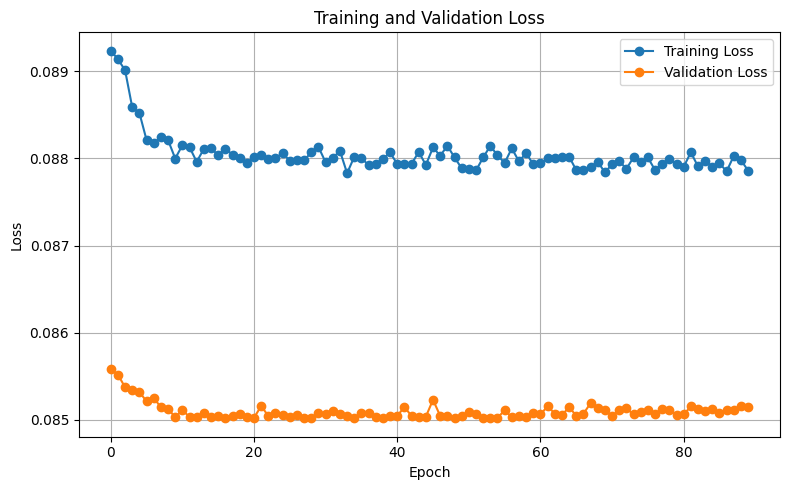

In [16]:
with open(f'{model_path_metrla}/results.json', 'r') as f:
    results = json.load(f)

plot_results(
    results['train_loss'],
    results['validation_loss']
)

In [31]:
y_true, y_pred = plot_predictions(
    best_model,
    training_set,
    valid_set,
    method='midpoint'
)

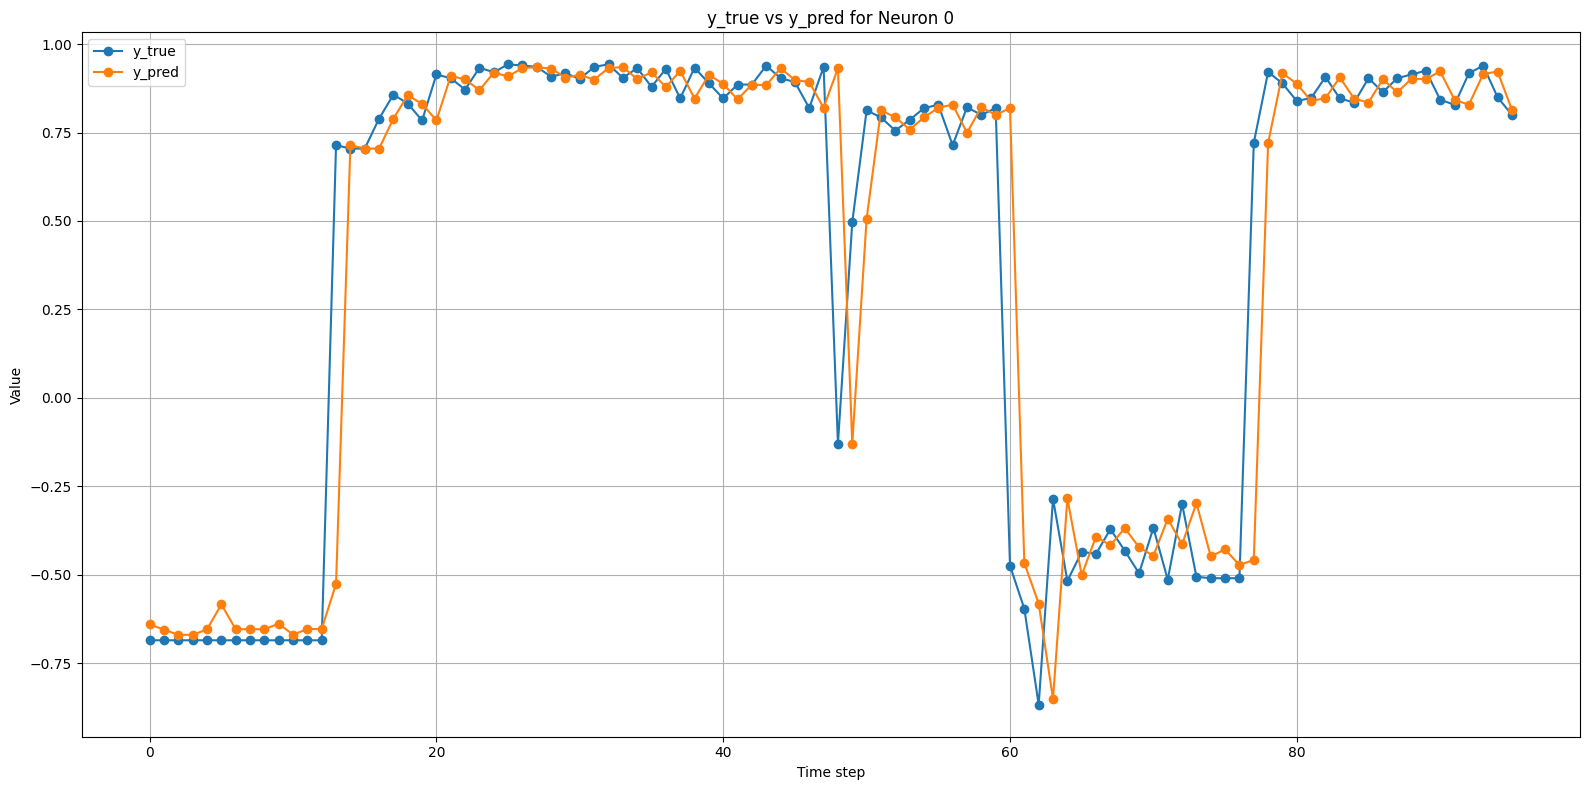

In [32]:
node_index = 0

plt.figure(figsize=(16, 8))
plt.plot(y_true[:, node_index, :], label='y_true', marker='o')
plt.plot(y_pred[:, node_index, :], label='y_pred', marker='o')
plt.xlabel('Time step')
plt.ylabel('Value')
plt.title(f'y_true vs y_pred for Neuron {node_index}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
y_true, y_pred = plot_predictions_integration(
    best_model,
    training_set,
    valid_set,
    method='midpoint'
)

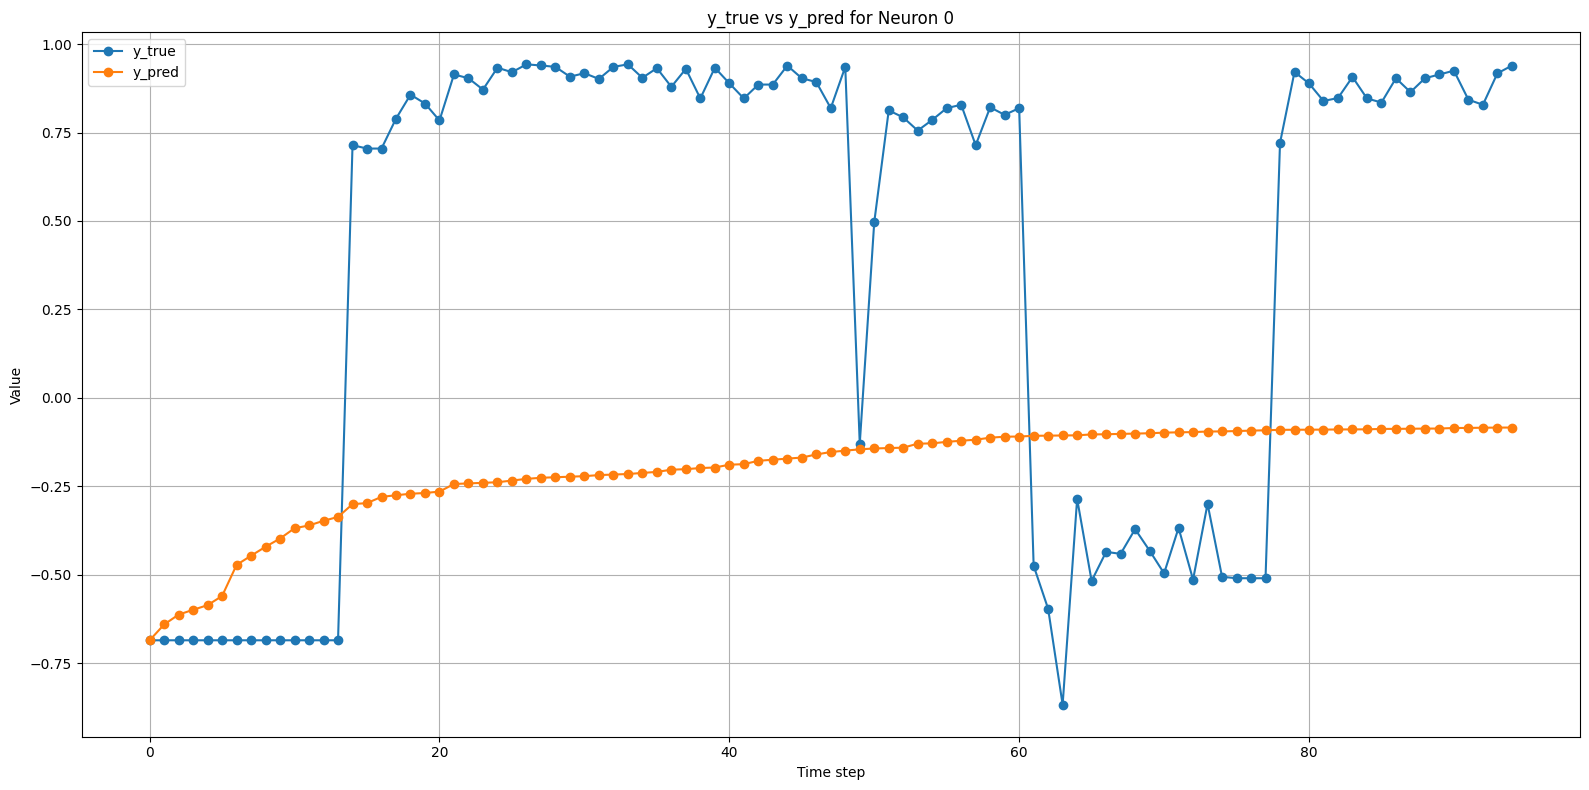

In [15]:
node_index = 0

plt.figure(figsize=(16, 8))
plt.plot(y_true[:, node_index, :], label='y_true', marker='o')
plt.plot(y_pred[:, node_index, :], label='y_pred', marker='o')
plt.xlabel('Time step')
plt.ylabel('Value')
plt.title(f'y_true vs y_pred for Neuron {node_index}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()